In [3]:
from tqdm import tqdm
import xarray as xr
import os
import seaborn as sns
import sys
sys.path.append('..')
from scipy import signal, stats, io

import numpy as np
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['font.size'] = 10
plt.rcParams['image.cmap'] = 'plasma'
np.set_printoptions(suppress=True)
%load_ext autoreload
%autoreload 2

In [15]:
bold_path = "../data/SimBoldNsubj_01_BLOCK_2s_TR_20s_DUR_10_BLOCKS_MATRIXv11.mat"
mat_path = '../data/01_BLOCK.mat'
input_data = io.loadmat(mat_path)

In [5]:
bold_mat = io.loadmat(bold_path)

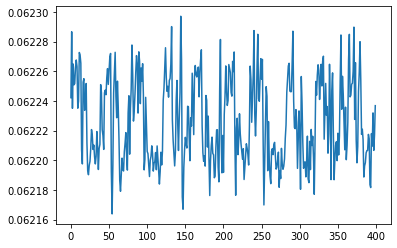

In [25]:
plt.plot(bold_mat['oscill'][3:,0,0])

In [100]:
BOLD = bold_mat['oscill'][3:,:,0]
maskRest = np.array(400*[False])
maskTaskB = np.array(400*[False])
maskTaskA  = np.array(400*[False])
badMask = np.array(400*[False])
for el in np.nditer(input_data['onsets'][0,0]//2):
    maskTaskA[el+3:el+10]=True
    maskRest[el+13:el+20]=True
for el in np.nditer(input_data['onsets'][0,1]//2):
    maskTaskB[el:el+10]=True 
    maskRest[el+13:el+20]=True

In [145]:
def plot_cors(bold, title_list=None, masks=None, noise_level=0.5):

    if title_list is None:
        title_list = ["Rest","TaskA", "TaskB","TaskA-TaskB"]
    if masks is None:    
        masks = [maskRest, maskTaskA, maskTaskB]
        
    BoldNormed = (bold- bold.mean())/(bold.std())
    BoldNoised = BoldNormed + noise_level*np.random.normal(size = BoldNormed.shape) 
    corrs = [np.corrcoef( BoldNoised[masks[i],:].T)  for i in range (3)]
    corrs.append(corrs[1]-corrs[2])
    
    
    
    fig, axs = plt.subplots(1, 4, figsize = (15,5))

    for i in [0,1,2]:
        im = axs[i].imshow(corrs[i], cmap='jet', vmin = 0, vmax=1); axs[i].set_title(title_list[i]);
        fig.colorbar(im, ax = axs[i], fraction=0.046, pad=0.04);
    im = axs[3].imshow(corrs[3], cmap='jet', vmin = -1, vmax=1); axs[3].set_title(title_list[3]);
    fig.colorbar(im, ax = axs[3], fraction=0.046, pad=0.04);    
    fig.suptitle(f"Correlation structure with NSR = {noise_level}", fontsize=14)    
    fig.tight_layout()
    return corrs


In [196]:
def plot_cors_sep(bold, title_list=None, masks=None, noise_level=0.5):

    if title_list is None:
        title_list = ["Rest","TaskA", "TaskB","TaskA-TaskB"]
    if masks is None:    
        masks = [maskRest, maskTaskA, maskTaskB]
    corrs = []
    for mask in masks:
        BoldNormed = (bold[mask]- bold[mask].mean())/(bold[mask].std())
        BoldNoised = BoldNormed + noise_level*np.random.normal(size = BoldNormed.shape) 
        corrs.append(np.corrcoef(BoldNoised.T))
    corrs.append(corrs[1]-corrs[2])
    
    
    
    fig, axs = plt.subplots(1, 4, figsize = (15,5))

    for i in [0,1,2]:
        im = axs[i].imshow(corrs[i], cmap='jet', vmin = 0, vmax=1); axs[i].set_title(title_list[i]);
        fig.colorbar(im, ax = axs[i], fraction=0.046, pad=0.04);
    im = axs[3].imshow(corrs[3], cmap='jet', vmin = -1, vmax=1); axs[3].set_title(title_list[3]);
    fig.colorbar(im, ax = axs[3], fraction=0.046, pad=0.04);    
    fig.suptitle(f"Correlation structure with NSR = {noise_level}", fontsize=14)    
    fig.tight_layout()
    return corrs

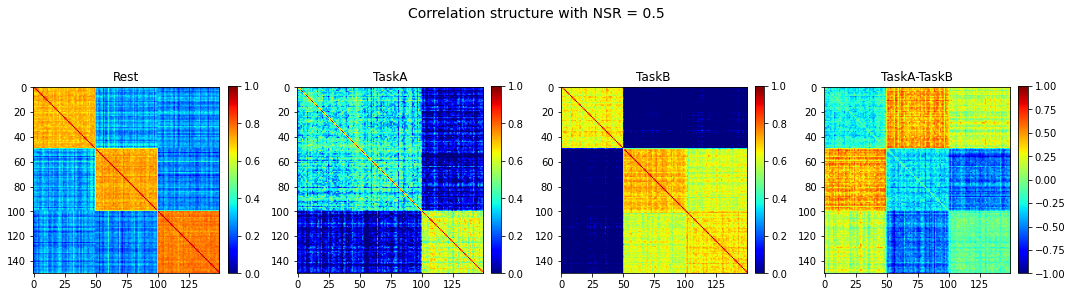

In [199]:
corrs = plot_cors_sep(BOLD, title_list=None, masks=None, noise_level=0.5)

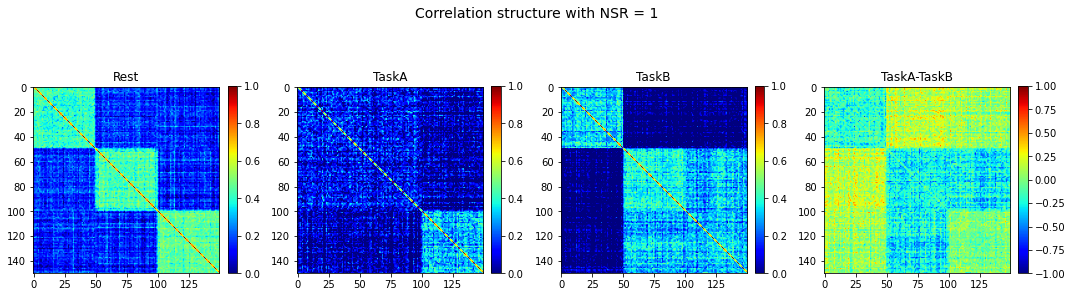

In [147]:
corrs = plot_cors(BOLD, noise_level=1)

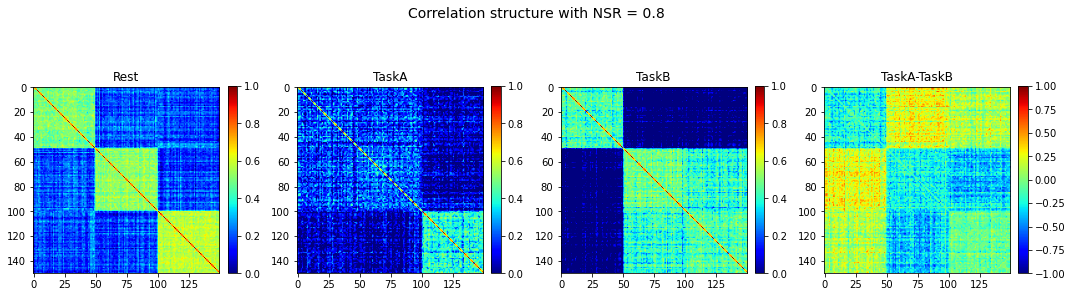

In [150]:
corrs = plot_cors(BOLD, noise_level=0.8)

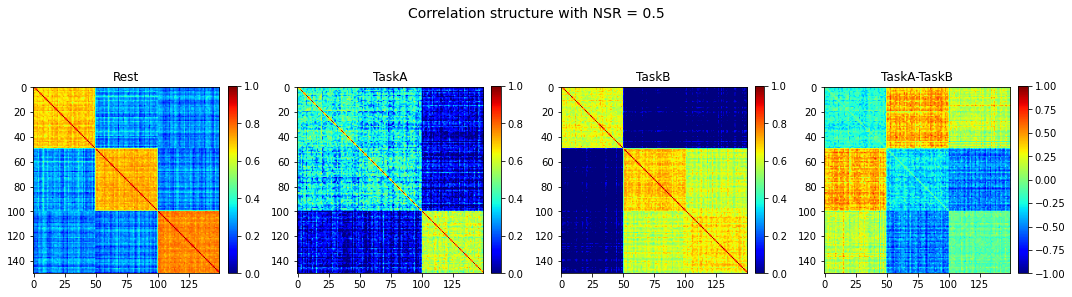

In [151]:
corrs = plot_cors(BOLD, noise_level=0.5)

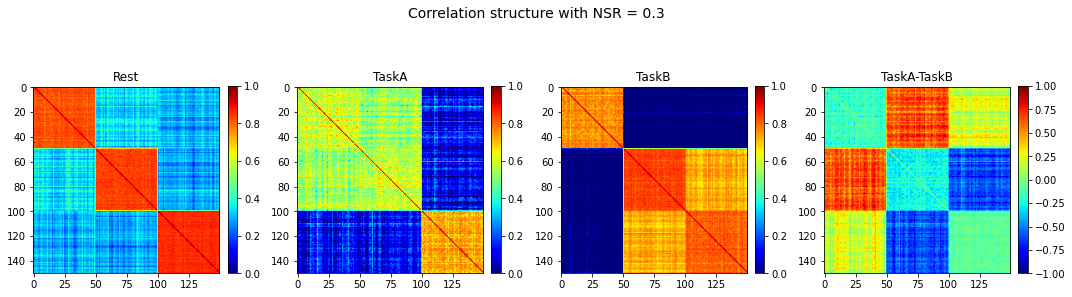

In [152]:
corrs = plot_cors(BOLD, noise_level=0.3)

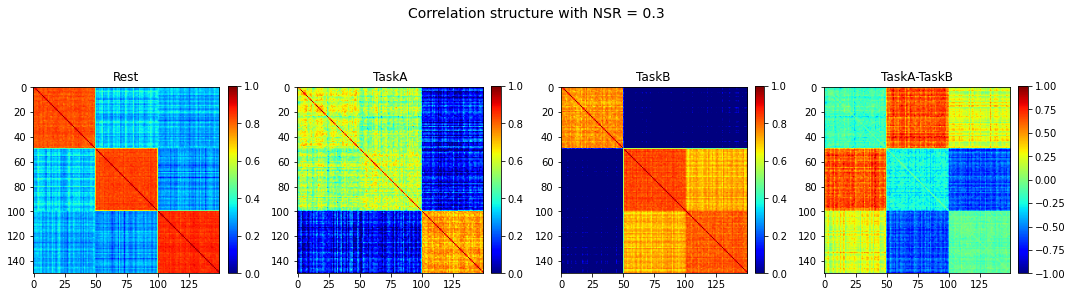

In [154]:
corrs = plot_cors(BOLD, noise_level=0.3)

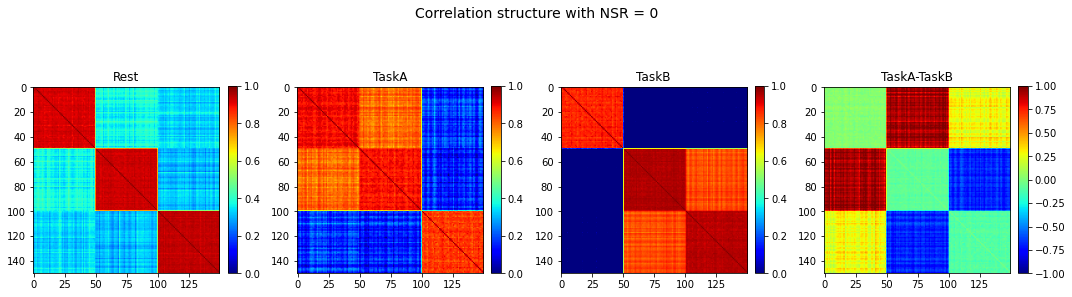

In [155]:
corrs = plot_cors(BOLD, noise_level=0)

In [200]:
masks = [maskRest, maskTaskA, maskTaskB]


In [244]:
for i in [0,1,2]:
    print(np.std(BoldNormed[masks[i]][:,148:]))

0.9975686023727205
0.716841300058109
0.7017437732493357


In [246]:
for i in [0,1,2]:
    print(np.std(BoldNormed[masks[i]][:,51:52]))

0.8845392730545037
0.41620961381385535
0.7717617094102334


In [247]:
for i in [0,1,2]:
    print(np.std(BoldNormed[masks[i]][:,101:102]))

0.9967085165242743
0.751568737158774
0.7584105966643444


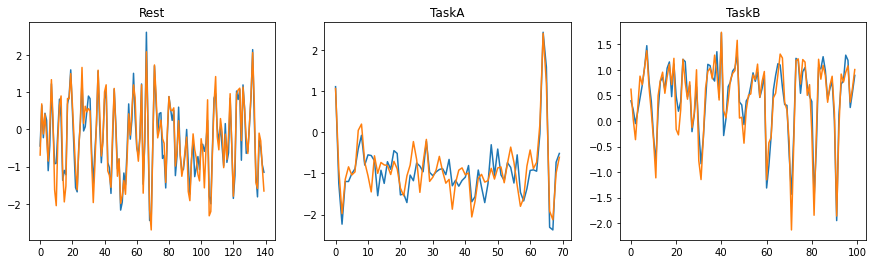

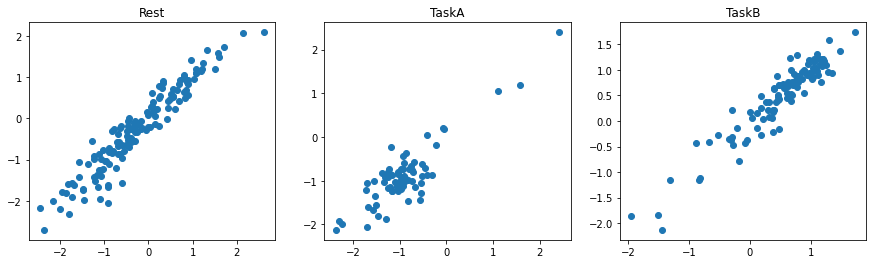

In [239]:
fig, axs = plt.subplots(1, 3, figsize = (15,4))
for i in [0,1,2]:
    axs[i].plot(BoldNormed[masks[i]][:,148:]); axs[i].set_title(title_list[i]);
fig, axs = plt.subplots(1, 3, figsize = (15,4))
for i in [0,1,2]:
    axs[i].scatter(BoldNormed[masks[i]][:,148],BoldNormed[masks[i]][:,149]); axs[i].set_title(title_list[i]);


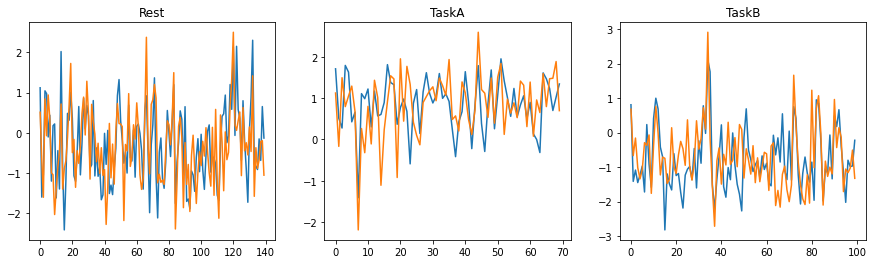

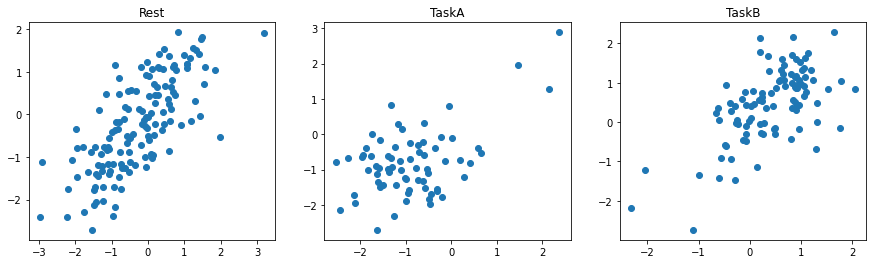

In [237]:
noise_level=0.5
BoldNoised = BoldNormed + noise_level*np.random.normal(size = BoldNormed.shape) 
fig, axs = plt.subplots(1, 3, figsize = (15,4))
for i in [0,1,2]:
    axs[i].plot(BoldNoised[masks[i]][:,0:2]); axs[i].set_title(title_list[i]);
fig, axs = plt.subplots(1, 3, figsize = (15,4))
    
for i in [0,1,2]:
    axs[i].scatter(BoldNoised[masks[i]][:,148],BoldNoised[masks[i]][:,149]); axs[i].set_title(title_list[i]);    

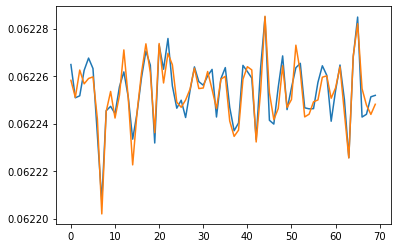

In [208]:
plt.plot(BOLD[masks[1]][:,0:2])

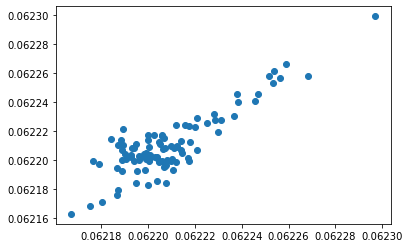

In [211]:
plt.scatter(BOLD[masks[2]][:,0],BOLD[masks[2]][:,1])

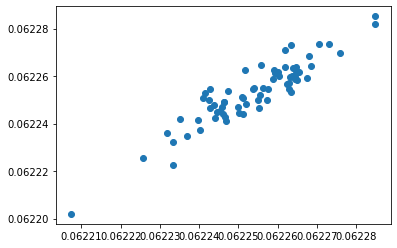

In [213]:
plt.scatter(BOLD[masks[1]][:,0],BOLD[masks[1]][:,1])

In [184]:
#BoldNormed[maskTaskA][:,[0,1]]

In [185]:
np.corrcoef(BoldNormed[maskTaskA][:,[148,149]].T)

array([[1.        , 0.88028571],
       [0.88028571, 1.        ]])

In [186]:
noise_level = 1
BoldNoised = BoldNormed + noise_level*np.random.normal(size = BoldNormed.shape) 

In [187]:
np.corrcoef(BoldNoised[maskTaskA][:,[0,1,50]].T)

array([[1.        , 0.23807774, 0.17952672],
       [0.23807774, 1.        , 0.15172286],
       [0.17952672, 0.15172286, 1.        ]])

In [188]:
np.corrcoef(BoldNoised[maskTaskA][:,[148,149]].T)

array([[1.        , 0.30789068],
       [0.30789068, 1.        ]])

In [191]:
np.corrcoef(BoldNormed[maskTaskA].T)[145:,145:]

array([[1.        , 0.87194401, 0.85548382, 0.87062304, 0.88857221],
       [0.87194401, 1.        , 0.87326802, 0.79820593, 0.83957693],
       [0.85548382, 0.87326802, 1.        , 0.81953358, 0.85517817],
       [0.87062304, 0.79820593, 0.81953358, 1.        , 0.88028571],
       [0.88857221, 0.83957693, 0.85517817, 0.88028571, 1.        ]])

In [192]:
np.corrcoef(BoldNormed[maskTaskA].T)[:5,:5]

array([[1.        , 0.91847347, 0.91823956, 0.92804416, 0.94044634],
       [0.91847347, 1.        , 0.89065116, 0.9001383 , 0.90417155],
       [0.91823956, 0.89065116, 1.        , 0.91001505, 0.90110665],
       [0.92804416, 0.9001383 , 0.91001505, 1.        , 0.89757598],
       [0.94044634, 0.90417155, 0.90110665, 0.89757598, 1.        ]])

In [194]:
np.corrcoef(BoldNoised[maskTaskA].T)[1:5,1:5]

array([[ 1.        ,  0.23472279,  0.20302981,  0.2657339 ],
       [ 0.23472279,  1.        , -0.09231291,  0.00500612],
       [ 0.20302981, -0.09231291,  1.        ,  0.19506594],
       [ 0.2657339 ,  0.00500612,  0.19506594,  1.        ]])

In [195]:
np.corrcoef(BoldNoised[maskTaskA].T)[145:,145:]

array([[1.        , 0.41604416, 0.49220597, 0.26289149, 0.34834826],
       [0.41604416, 1.        , 0.40183831, 0.44819409, 0.31403498],
       [0.49220597, 0.40183831, 1.        , 0.25593932, 0.30529389],
       [0.26289149, 0.44819409, 0.25593932, 1.        , 0.30789068],
       [0.34834826, 0.31403498, 0.30529389, 0.30789068, 1.        ]])